In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

# in this dataset we have 10 reviews
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']
# the first 5 are positive and the rest are negative
sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

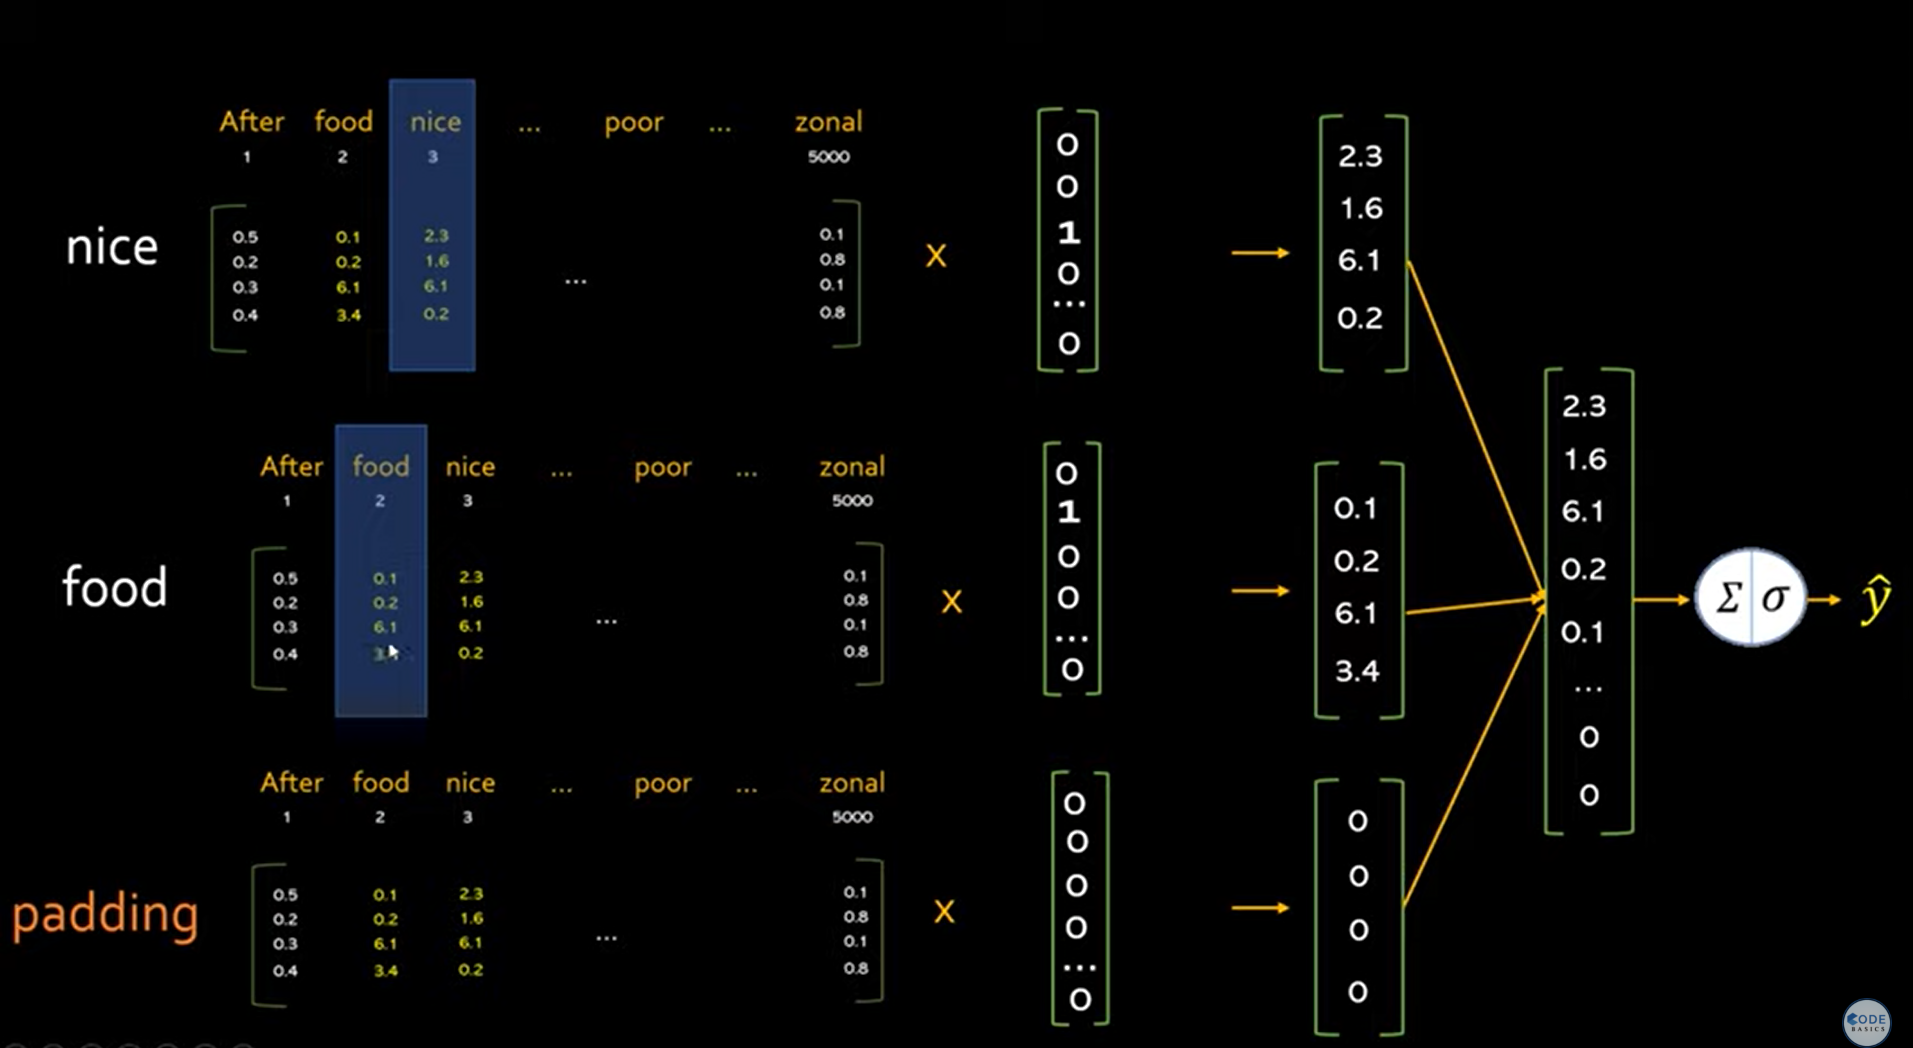

In [2]:
"""
one hot method gives a unique number to each word specificied by the given 
range in this case between 1 and 30 and internally keras will onehot encode those numbers
"""
one_hot("amazing restaurant",30)

[15, 22]

In [3]:
"""
lets encode each review
"""
vocab_size = 30
encoded_reviews = [one_hot(review,vocab_size) for review in reviews]
encoded_reviews

[[5, 3],
 [15, 22],
 [8, 1],
 [15, 25, 10],
 [29, 7, 23],
 [11, 3],
 [22, 7, 29],
 [14, 21],
 [14, 27],
 [21, 11]]

In [4]:
# padding needs to be done as not all the reviews has the same size
max_padding = 3
# pad 
padded_reviews = pad_sequences(encoded_reviews, maxlen = max_padding, padding = 'post')
padded_reviews

array([[ 5,  3,  0],
       [15, 22,  0],
       [ 8,  1,  0],
       [15, 25, 10],
       [29,  7, 23],
       [11,  3,  0],
       [22,  7, 29],
       [14, 21,  0],
       [14, 27,  0],
       [21, 11,  0]])

* This is our embadded vector

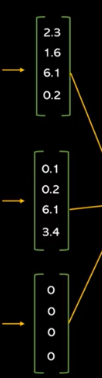

In [5]:
# embedding class 
embedded_vector_size = 5

model = Sequential()
model.add(Embedding(vocab_size,embedded_vector_size, input_length = max_padding, name = 'embedding'))
model.add(Flatten())
model.add(Dense(1,activation = 'sigmoid'))

In [6]:
X = padded_reviews
y = sentiment

In [7]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 5)              150       
                                                                 
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X,y,epochs = 10,verbose = 0)

In [9]:
loss, accuracy = model.evaluate(X,y)
accuracy

1/1 [==============================] - 0s 129ms/step - loss: 0.6667 - accuracy: 1.0000


1.0

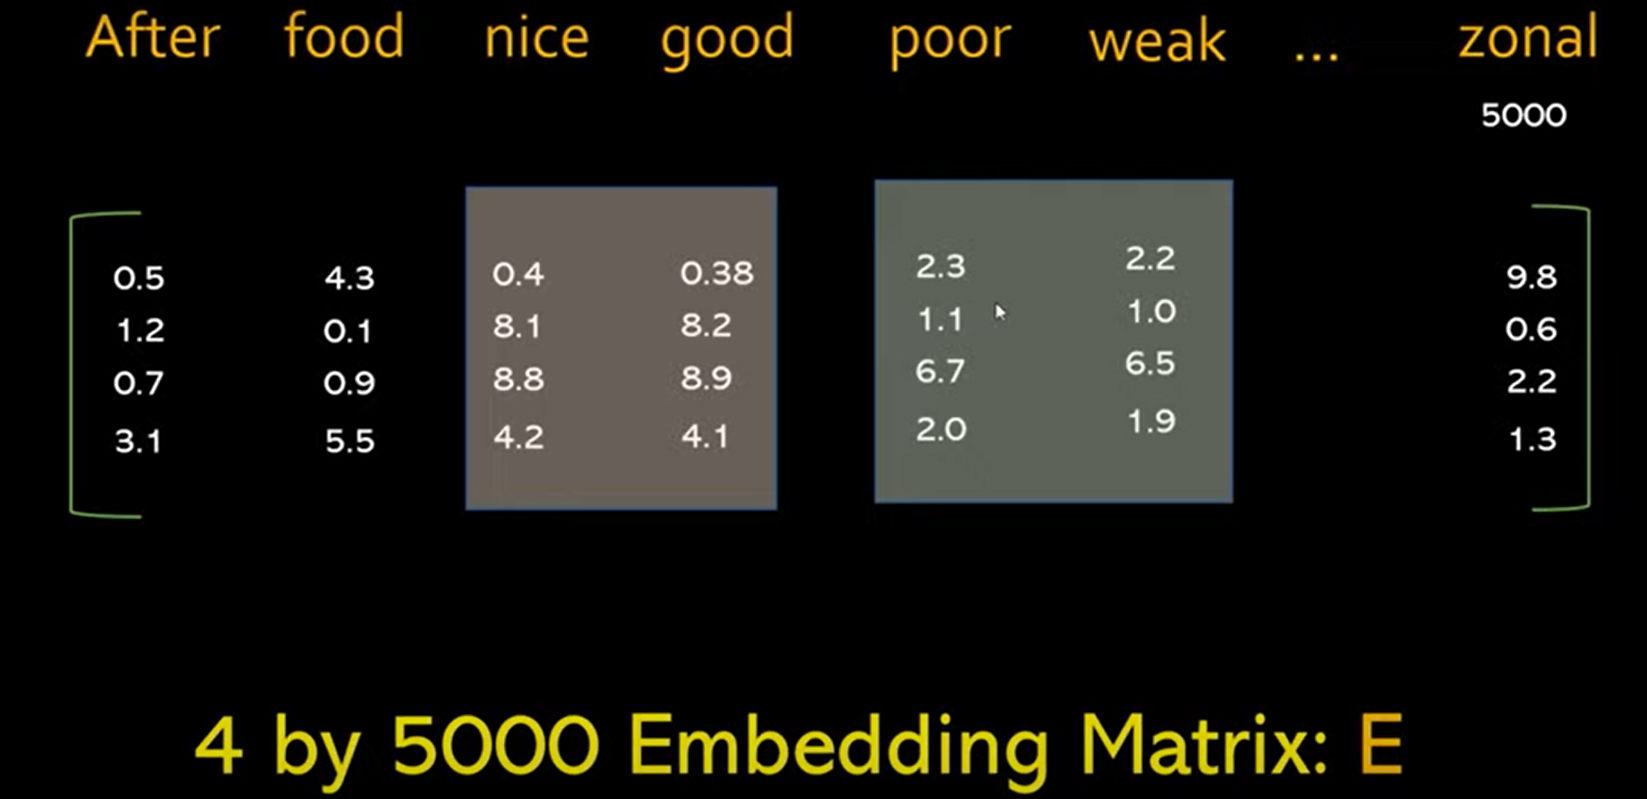

In [10]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [11]:
# the extracted weight for nice
weights[5]

array([-0.05970142, -0.05717925, -0.03986635, -0.00589028, -0.04998828],
      dtype=float32)

In [13]:
# the extracted weight for amazing
weights[15]

array([-0.05724436, -0.00236914, -0.05283605, -0.02873386, -0.05507518],
      dtype=float32)

* in our scanario the weights are not very close despite that the words are similar but that is becouse the dataset is small